In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os

In [2]:
rays = "/Users/Blake Bullwinkel/Documents/Harvard/denn/experiments/runs/RAYS_run/animation"

In [3]:
y0s = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
preds = [np.load(os.path.join(rays, f"pred_pred_{str(y0)}.npy")) for y0 in y0s]
solns = [np.load(os.path.join(rays, f"soln_pred_{str(y0)}.npy")) for y0 in y0s]

In [4]:
means = [[0.74507886, 0.3602802 ],
        [0.40147605, 0.06139579],
        [0.94162198, 0.46722697],
        [0.79110703, 0.8973808 ],
        [0.64732527, 0.07095655],
        [0.10083943, 0.31935057],
        [0.24929806, 0.60499613],
        [0.11377013, 0.42598647],
        [0.85163671, 0.26495608],
        [0.18439795, 0.31438099]]

In [5]:
x1 = np.linspace(-0.1, 1.1, 500)
y1 = np.linspace(-0.2, 1.1, 500)
x, y = np.meshgrid(x1, y1)
A = 0.1
sig = 0.1
V = 0
for i in means:
    muX1 = i[0]
    muY1 = i[1]
    V += -A*np.exp(-(((x-muX1)**2 + (y-muY1)**2) / sig**2)/2) 

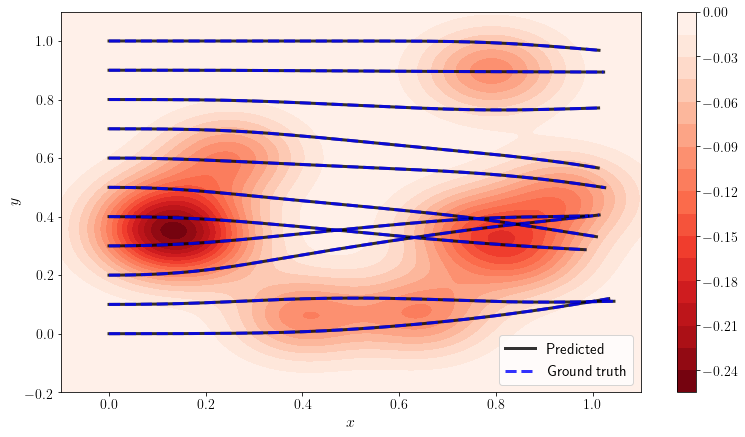

In [7]:
fig, ax = plt.subplots(figsize=(13,7))
plt.rc('axes', titlesize=16, labelsize=16)
plt.rc('legend', fontsize=15)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rcParams['text.usetex'] = True
for i, (pred, soln) in enumerate(zip(preds, solns)):
    if i == 0:
        ax.plot(pred[:,0], pred[:,1], lw=3, color='black', alpha=0.8, label='Predicted')
        ax.plot(soln[:,0], soln[:,1], lw=3, linestyle='dashed', color='blue', alpha=0.8, label='Ground truth')
    else:
        ax.plot(pred[:,0], pred[:,1], lw=3, color='black', alpha=0.8)
        ax.plot(soln[:,0], soln[:,1], lw=3, linestyle='dashed', color='blue', alpha=0.8)
cf = ax.contourf(x1, y1, V, cmap='Reds_r', levels=20)
cbar = fig.colorbar(cf)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc='lower right')
plt.show()
#plt.savefig('rays2d.png', dpi=300)